In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
import seaborn as sb
from statistics import mode

In [6]:
df = pd.read_csv("ciso_log1.csv",index_col=None)

In [7]:
df.shape

(31645, 26)

In [8]:
df.head()

,Threat/Content Type,Generate Time,Source address,Destination address,Application,Source Zone,Destination Zone,Session ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Flags,IP Protocol,Action,Bytes,Bytes Sent,Bytes Received,Packets,Source Country,Destination Country,Packets Sent,Packets Received,Session End Reason,UUID for rule,HTTP/2 Connection
0,end,30/9/2021 10:05,172.75.192.13,185.228.168.10,dns,Inside,Internet,3002860,37324,53,0,0,0x19,udp,allow,106,106,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
1,end,30/9/2021 10:05,172.75.192.13,185.228.168.10,dns,Inside,Internet,1764285,59386,53,0,0,0x19,udp,allow,102,102,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
2,end,30/9/2021 10:05,172.75.192.13,185.228.168.11,dns,Inside,Internet,40495,50733,53,0,0,0x19,udp,allow,95,95,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
3,end,30/9/2021 10:05,103.38.175.116,208.67.220.123,dns,Inside,Internet,3095955,63278,53,0,0,0x19,udp,allow,308,95,213,2,Philippines,United States,1,1,aged-out,b6db6bf4-21e4-4c90-bc9c-e0faf4bc4fd4,0
4,end,30/9/2021 10:05,172.75.192.135,185.228.168.10,dns,Inside,Internet,1363020,39931,53,0,0,0x19,udp,allow,91,91,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0


In [9]:
df['Generate Time'] = pd.to_datetime(df['Generate Time'])


In [10]:
app_value=df['Application']
#app_value=pd.DataFrame(app_value)
app_value_count=app_value.value_counts()
#app_value_count=pd.DataFrame(app_value_count)
app_value_count_top10=app_value_count.head(10)
app_value_count_top10
xfor_plot=app_value_count_top10.index.tolist()
yfor_plot=app_value_count_top10.values.tolist()


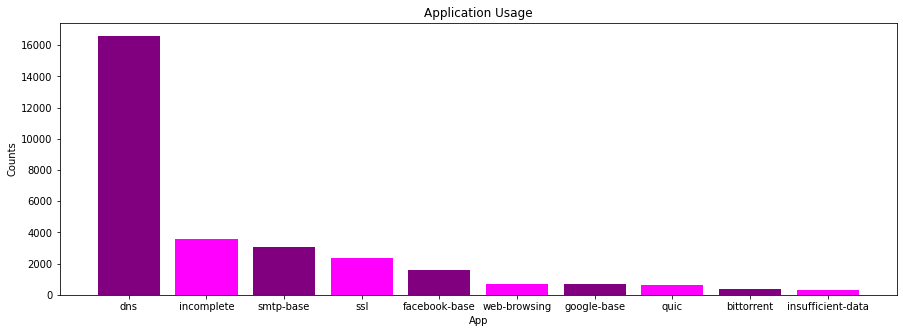

In [11]:
# Plotting Top 10 Application
fig = plt.figure(figsize = (15, 5))
plt.bar(xfor_plot,yfor_plot,color=['purple', 'magenta'])
plt.xlabel("App")
plt.ylabel("Counts")
plt.title("Application Usage")
plt.show()

In [12]:
incomplete=df.loc[df['Application'] == 'incomplete']
incomplete

,Threat/Content Type,Generate Time,Source address,Destination address,Application,Source Zone,Destination Zone,Session ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Flags,IP Protocol,Action,Bytes,Bytes Sent,Bytes Received,Packets,Source Country,Destination Country,Packets Sent,Packets Received,Session End Reason,UUID for rule,HTTP/2 Connection
115,end,2021-09-30 10:05:00,182.54.146.49,157.40.173.38,incomplete,Inside,Internet,2308576,55366,60437,0,0,0x19,tcp,allow,264,264,0,4,Philippines,India,4,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
116,end,2021-09-30 10:05:00,203.21.141.10,88.208.208.188,incomplete,Inside,Internet,2982536,50790,445,0,0,0x19,tcp,allow,264,264,0,4,Philippines,United Kingdom,4,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
117,end,2021-09-30 10:05:00,10.255.173.23,88.10.170.15,incomplete,Inside,Internet,3657766,60235,445,8910,445,0x400019,tcp,allow,66,66,0,1,10.0.0.0-10.255.255.255,Spain,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
119,end,2021-09-30 10:05:00,182.54.147.145,178.18.230.128,incomplete,Inside,Internet,2000521,60232,6906,0,0,0x19,tcp,allow,264,264,0,4,Kiribati,Russian Federation,4,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
120,end,2021-09-30 10:05:00,10.255.173.23,13.6.214.35,incomplete,Inside,Internet,4030047,63662,445,16913,445,0x400019,tcp,allow,264,264,0,4,10.0.0.0-10.255.255.255,United States,4,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31638,end,2021-09-30 10:47:00,10.255.164.60,34.209.30.116,incomplete,Inside,Internet,1401501,20651,25,16387,25,0x400019,tcp,allow,66,66,0,1,10.0.0.0-10.255.255.255,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
31639,end,2021-09-30 10:47:00,10.255.164.60,8.31.233.27,incomplete,Inside,Internet,2046943,20655,25,46476,25,0x400019,tcp,allow,66,66,0,1,10.0.0.0-10.255.255.255,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
31641,end,2021-09-30 10:47:00,10.255.164.60,52.72.197.234,incomplete,Inside,Internet,2044262,20767,25,33582,25,0x400019,tcp,allow,264,264,0,4,10.0.0.0-10.255.255.255,United States,4,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0
31642,end,2021-09-30 10:47:00,10.255.164.60,210.128.48.74,incomplete,Inside,Internet,1571632,20654,25,20620,25,0x400019,tcp,allow,66,66,0,1,10.0.0.0-10.255.255.255,Japan,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0


In [13]:
top_src=incomplete.value_counts(subset=['Source address', 'Application', 'Bytes Sent','Bytes Received' ])
top_src.head(10)

Source address  Application  Bytes Sent  Bytes Received
10.255.164.60   incomplete   66          0                 373
182.54.147.14   incomplete   66          0                 206
10.255.166.95   incomplete   186         66                158
10.255.164.60   incomplete   264         0                 152
10.255.173.23   incomplete   66          0                 142
182.54.147.45   incomplete   246         126               124
10.255.174.96   incomplete   66          0                 106
10.255.173.23   incomplete   264         0                  80
182.54.147.45   incomplete   186         126                72
203.21.141.10   incomplete   66          0                  63
dtype: int64

**Lets Drill down in details**

In [14]:
suspect = incomplete.set_index(['Source address'])
suspect = suspect.loc['10.255.164.60']
suspect.shape

(546, 25)

In [15]:
for_picture = suspect[['Destination address','Destination Port', 'IP Protocol', 'Bytes Sent', 'Bytes Received']]
for_picture.tail(10)

,Destination address,Destination Port,IP Protocol,Bytes Sent,Bytes Received
Source address,,,,,
10.255.164.60,8.31.233.70,25,tcp,264,0
10.255.164.60,17.178.102.78,25,tcp,264,0
10.255.164.60,199.59.148.144,25,tcp,66,0
10.255.164.60,52.24.249.124,25,tcp,66,0
10.255.164.60,185.79.118.151,25,tcp,264,0
10.255.164.60,34.209.30.116,25,tcp,66,0
10.255.164.60,8.31.233.27,25,tcp,66,0
10.255.164.60,52.72.197.234,25,tcp,264,0
10.255.164.60,210.128.48.74,25,tcp,66,0


In [16]:
unique_dst=np.unique(suspect['Destination address'])
print(unique_dst.shape)


(174,)


In [17]:
suspect['Destination Port'].value_counts()

25    546
Name: Destination Port, dtype: int64

In [18]:
suspect_byte=suspect['Bytes Sent']
suspect_byte_count=suspect_byte.value_counts()
print(suspect_byte_count)

xfor_suspect=suspect_byte_count.index.tolist()
yfor_suspect=suspect_byte_count.values.tolist()

66     381
264    152
132      7
198      4
186      2
Name: Bytes Sent, dtype: int64


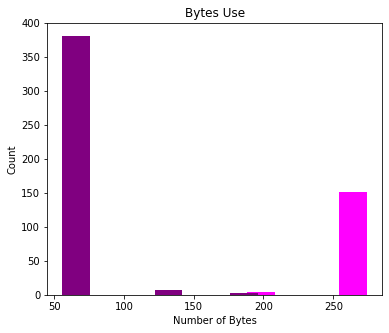

In [19]:
# Plotting Top 10 Application
fig = plt.figure(figsize = (6, 5))
plt.bar(xfor_suspect,yfor_suspect, width=20, color=['purple', 'magenta'])
plt.xlabel("Number of Bytes")
plt.ylabel("Count")
plt.title("Bytes Use")
plt.show()

**Create Label**

In [20]:
def label_anomalous(text):
    if text == "10.255.164.60":
        return 0
    else:
        return 1

In [21]:
df["label"] = df["Source address"].apply(label_anomalous)
df.head(-3)

,Threat/Content Type,Generate Time,Source address,Destination address,Application,Source Zone,Destination Zone,Session ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Flags,IP Protocol,Action,Bytes,Bytes Sent,Bytes Received,Packets,Source Country,Destination Country,Packets Sent,Packets Received,Session End Reason,UUID for rule,HTTP/2 Connection,label
0,end,2021-09-30 10:05:00,172.75.192.13,185.228.168.10,dns,Inside,Internet,3002860,37324,53,0,0,0x19,udp,allow,106,106,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,1
1,end,2021-09-30 10:05:00,172.75.192.13,185.228.168.10,dns,Inside,Internet,1764285,59386,53,0,0,0x19,udp,allow,102,102,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,1
2,end,2021-09-30 10:05:00,172.75.192.13,185.228.168.11,dns,Inside,Internet,40495,50733,53,0,0,0x19,udp,allow,95,95,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,1
3,end,2021-09-30 10:05:00,103.38.175.116,208.67.220.123,dns,Inside,Internet,3095955,63278,53,0,0,0x19,udp,allow,308,95,213,2,Philippines,United States,1,1,aged-out,b6db6bf4-21e4-4c90-bc9c-e0faf4bc4fd4,0,1
4,end,2021-09-30 10:05:00,172.75.192.135,185.228.168.10,dns,Inside,Internet,1363020,39931,53,0,0,0x19,udp,allow,91,91,0,1,United States,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31637,end,2021-09-30 10:47:00,10.255.164.60,185.79.118.151,incomplete,Inside,Internet,2497140,20765,25,27633,25,0x400019,tcp,allow,264,264,0,4,10.0.0.0-10.255.255.255,Russian Federation,4,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,0
31638,end,2021-09-30 10:47:00,10.255.164.60,34.209.30.116,incomplete,Inside,Internet,1401501,20651,25,16387,25,0x400019,tcp,allow,66,66,0,1,10.0.0.0-10.255.255.255,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,0
31639,end,2021-09-30 10:47:00,10.255.164.60,8.31.233.27,incomplete,Inside,Internet,2046943,20655,25,46476,25,0x400019,tcp,allow,66,66,0,1,10.0.0.0-10.255.255.255,United States,1,0,aged-out,73cd82b1-87ed-4fd6-8846-0931292d2a63,0,0
31640,end,2021-09-30 10:47:00,182.54.146.8,119.205.212.219,smtp-base,Inside,Internet,2915824,49402,25,0,0,0x1c,tcp,allow,707,306,401,9,Philippines,Korea Republic Of,5,4,tcp-fin,687a2297-a5d2-4e1f-833d-f24f0fc9dae8,0,1


In [22]:
features = ['Application', 'Destination Port', 'Bytes Sent', 'Bytes Received']
target = 'label'

In [23]:
X = df.loc[:,features]
y = df.loc[:,target]
X.tail()

,Application,Destination Port,Bytes Sent,Bytes Received
31640,smtp-base,25,306,401
31641,incomplete,25,264,0
31642,incomplete,25,66,0
31643,incomplete,25,66,0
31644,smtp-base,25,579,587


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application       31645 non-null  object
 1   Destination Port  31645 non-null  int64 
 2   Bytes Sent        31645 non-null  int64 
 3   Bytes Received    31645 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 989.0+ KB


[]

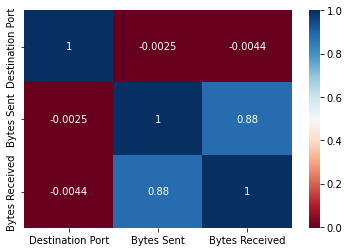

In [25]:
sb.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()

**Convert the Value in Application Feature to Numeric**

In [26]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
X['Application']= label_encoder.fit_transform(X['Application']) 
print(X.tail())

       Application  Destination Port  Bytes Sent  Bytes Received
31640           75                25         306             401
31641           35                25         264               0
31642           35                25          66               0
31643           35                25          66               0
31644           75                25         579             587


In [27]:
for_km = df[["Destination Port","Bytes Sent"]]
for_km

,Destination Port,Bytes Sent
0,53,106
1,53,102
2,53,95
3,53,95
4,53,91
...,...,...
31640,25,306
31641,25,264
31642,25,66
31643,25,66


**Using KMeans to separate the dataset into clusters**

In [28]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(for_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
Kmean.cluster_centers_

array([[1.55594558e+03, 2.74763214e+03],
       [4.43000000e+02, 2.37910480e+07],
       [3.06722222e+02, 2.34116800e+06]])

In [30]:
print('label', Kmean.labels_)

label [0 0 0 ... 0 0 0]


In [31]:
X_kcluster = df[['Source address','Destination address', 'Application','Source Port', 'Destination Port', 'Bytes Sent', 'label']]

In [32]:
X_kcluster['cluster'] = Kmean.labels_
X_kcluster['cluster'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    31626
2       18
1        1
Name: cluster, dtype: int64

In [42]:
print(X_kcluster.loc[X_kcluster.cluster==0,:])
print(X_kcluster.loc[X_kcluster.cluster==1,:])
print(X_kcluster.loc[X_kcluster.cluster==2,:])


       Source address Destination address  ... label  cluster
0       172.75.192.13      185.228.168.10  ...     1        0
1       172.75.192.13      185.228.168.10  ...     1        0
2       172.75.192.13      185.228.168.11  ...     1        0
3      103.38.175.116      208.67.220.123  ...     1        0
4      172.75.192.135      185.228.168.10  ...     1        0
...               ...                 ...  ...   ...      ...
31640    182.54.146.8     119.205.212.219  ...     1        0
31641   10.255.164.60       52.72.197.234  ...     0        0
31642   10.255.164.60       210.128.48.74  ...     0        0
31643   10.255.164.60       34.217.152.37  ...     0        0
31644   10.255.164.60       185.20.49.164  ...     0        0

[31626 rows x 8 columns]
      Source address Destination address  ... label  cluster
9577  182.54.147.131         72.52.87.69  ...     1        1

[1 rows x 8 columns]
       Source address Destination address  ... label  cluster
4336    10.255.171.13   

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

In [38]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of  model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of  model is:  97.08236781124921
Confusion Matrix:
 [[   0  228]
 [  49 9217]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.98      0.99      0.99      9266

    accuracy                           0.97      9494
   macro avg       0.49      0.50      0.49      9494
weighted avg       0.95      0.97      0.96      9494


==============***===============
Accuracy of  model is:  99.30482409943122
Confusion Matrix:
 [[ 205   23]
 [  43 9223]]
Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       228
           1       1.00      1.00      1.00      9266

    accuracy                           0.99      9494
   macro avg       0.91      0.95      0.93      9494
weighted avg       0.99      0.99      0.99      9494


==============***===============
Accuracy of  model is:  98.52538445333894
Confusion Matrix:
 [[ 157   71]
 [  69 919

In [39]:
#scores=scores[:4]
scores

[97.08236781124921, 99.30482409943122, 98.52538445333894, 99.43121971771646]

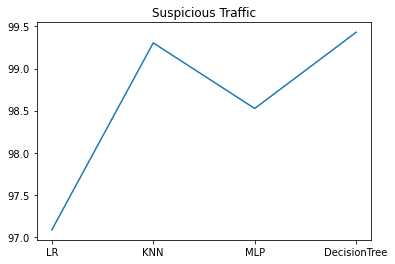

In [40]:
plt.plot(classifiers,scores)
plt.title("Suspicious Traffic")
plt.show()